##**Histogram Enhancement**
I captured three night images and applied histogram enhancement techniques to improve their visibility.

For each image, I compared the original and enhanced versions by analyzing:

The image itself Its histogram Its cumulative histogram I experimented with two different enhancement methods, including Histogram Equalization and CLAHE (Contrast Limited Adaptive Histogram Equalization) to observe their effects.

Additionally, for one selected image, I designed a custom transformation function based on its histogram. I applied this function and visually analyzed the improvements.

Finally, I documented my observations and provided a comparison of the different transformation methods used.

#Utils

Library

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import cv2

Pathler

In [ ]:
image_paths = ["/content/Group3_ayse.jpg","/content/Group3_arzu.jpg","/content/Group3_muhammed.jpg"]

Function

In [24]:
# Function to calculate Histogram and Cumulative Histogram
def plot_histograms(img):
    # Flatten the image and calculate the histogram
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()  # Calculate the cumulative frequency
    return hist, cdf  # Return both histogram and cumulative frequency

# Function to calculate Histogram (for second method)
def plot_histogram(img):
    # Calculate the histogram of the image
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    return hist  # Return the histogram

# Function to calculate Cumulative Histogram
def plot_cumulative_histogram(img):
    # Calculate the histogram of the image
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    cdf = hist.cumsum()  # Calculate the cumulative frequency
    cdf_normalized = cdf / cdf.max()  # Normalize the cumulative frequency for visualization
    return cdf_normalized  # Return the normalized cumulative frequency

#STEP-1
In **Step 1**, we will apply two different enhancement methods to three images and visualize the results. For each method, we will display the original image, its histogram and cumulative histogram, followed by the improved image, along with their respective histograms and cumulative histograms.

1.Method (HISTOGRAM EQUALIZATION)

## ✅ **What is Histogram Equalization?**

**Histogram Equalization** is a method used in image processing to **improve the contrast of an image**.  
👉 **Purpose:** To make **dark and bright areas** of an image **more visible and clearer**.  
👉 **How does it work?** It **redistributes the pixel intensity values (0 to 255)** to spread them more evenly across the entire range, enhancing the overall contrast.  

---

### 🔑 **Key Points:**
- Makes **hidden details more visible**.  
- Useful for **low contrast images** (too dark or too bright).  
- Commonly applied to **grayscale images**.  

---

### 🎯 **Why do we use it?**
- To **fix images that are too dark or too bright**.  
- To **enhance the quality** of an image automatically, without manual adjustments.  

---

##💡 **In short:**  
Histogram Equalization is a technique that **automatically adjusts and improves image contrast** by spreading out the pixel intensity values.  

a)

i)Original images

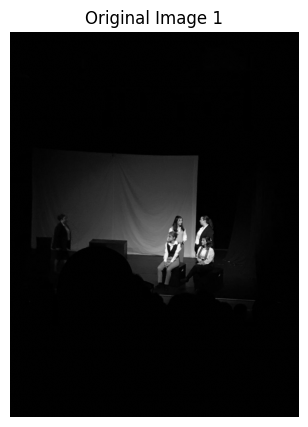

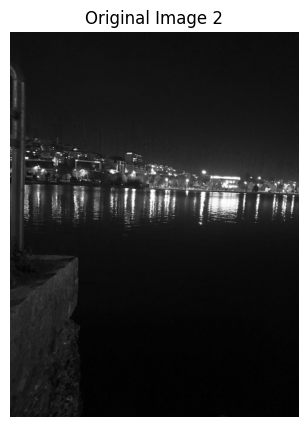

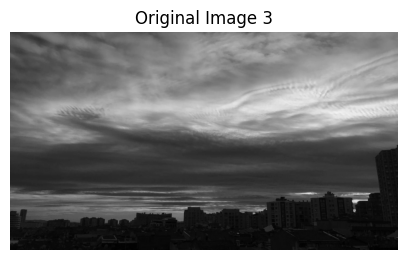

In [12]:
for idx, path in enumerate(image_paths):  # Loop through the list of image paths, get index and path
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode

    plt.figure(figsize=(5, 5))  # Create a new figure with size 5x5 inches
    plt.imshow(img, cmap='gray')  # Display the image using a gray colormap
    plt.title(f'Original Image {idx+1}')  # Add a title showing the image number
    plt.axis('off')  # Hide the axes
    plt.show()  # Show the image on screen

ii) histogram original

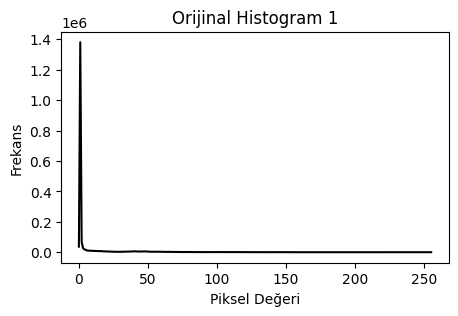

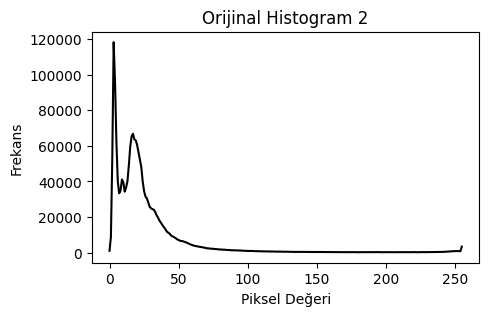

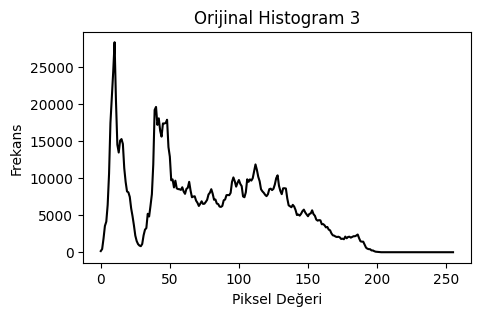

In [ ]:
for idx, path in enumerate(image_paths):  # Loop through the list of image paths, get index and path
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode

    hist, _ = plot_histograms(img)  # Calculate the histogram of the image using a custom function

    plt.figure(figsize=(5, 3))  # Create a new figure with size 5x3 inches
    plt.plot(hist, color='black')  # Plot the histogram as a black line
    plt.title(f'Original Histogram {idx+1}')  # Add a title showing the histogram number
    plt.xlabel('Pixel Value')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.show()  # Show the histogram on screen

iii)improved histogram

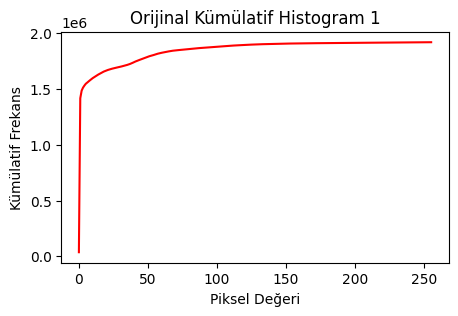

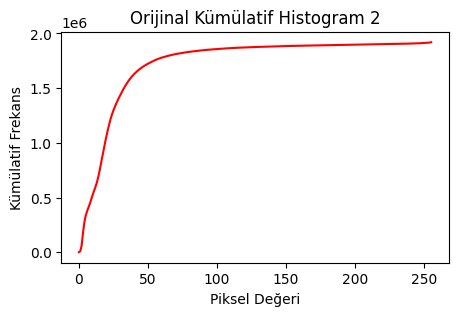

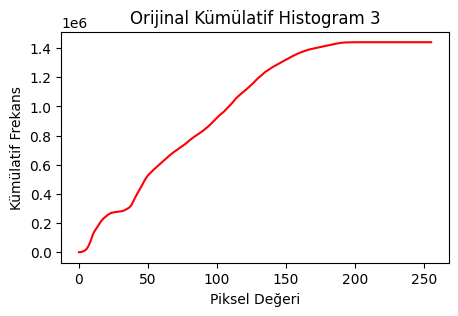

In [ ]:
for idx, path in enumerate(image_paths):  # Loop through the list of image paths, get index and path
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode

    _, cdf = plot_histograms(img)  # Calculate the cumulative histogram (CDF) using a custom function

    plt.figure(figsize=(5, 3))  # Create a new figure with size 5x3 inches
    plt.plot(cdf, color='red')  # Plot the cumulative histogram as a red line
    plt.title(f'Original Cumulative Histogram {idx+1}')  # Add a title showing the cumulative histogram number
    plt.xlabel('Pixel Value')  # Label for the x-axis
    plt.ylabel('Cumulative Frequency')  # Label for the y-axis
    plt.show()  # Show the cumulative histogram on screen

b)

i)Improved images

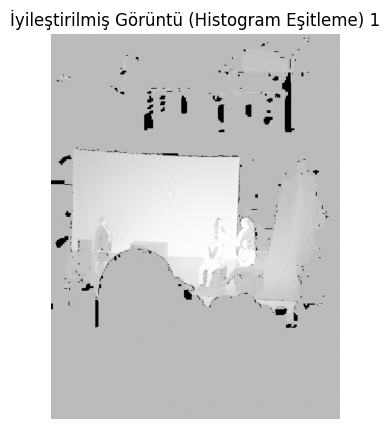

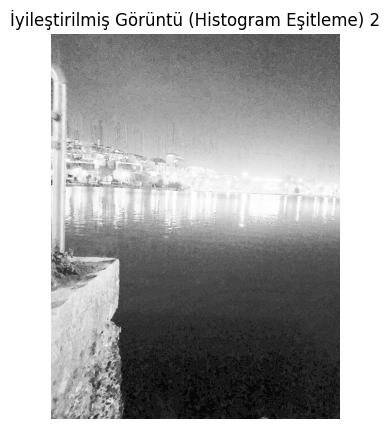

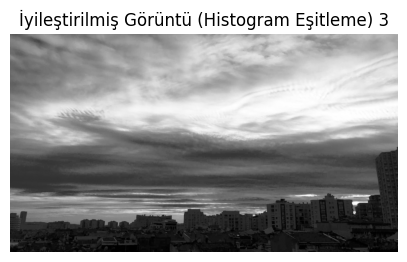

In [ ]:
for idx, path in enumerate(image_paths):  # Loop through the list of image paths, get index and path
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode

    # Histogram Equalization
    img_eq = cv2.equalizeHist(img)  # Apply histogram equalization to enhance contrast

    # Show the enhanced image
    plt.figure(figsize=(5, 5))  # Create a new figure with size 5x5 inches
    plt.imshow(img_eq, cmap='gray')  # Display the enhanced image in gray colormap
    plt.title(f'Enhanced Image (Histogram Equalization) {idx+1}')  # Add a title showing the image number
    plt.axis('off')  # Hide the axes
    plt.show()  # Show the image on screen

ii)Histogram of images

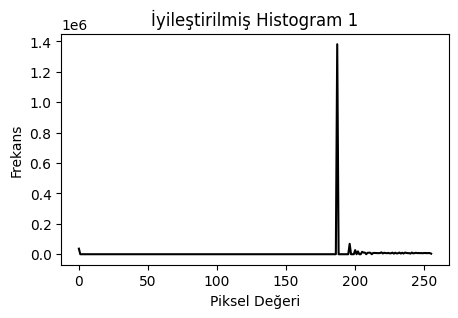

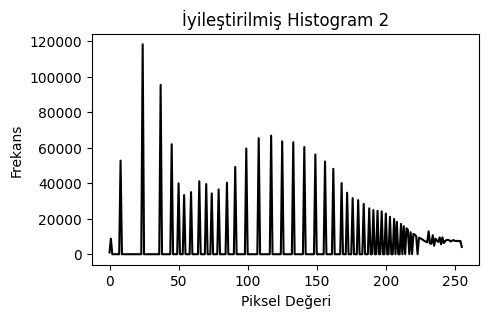

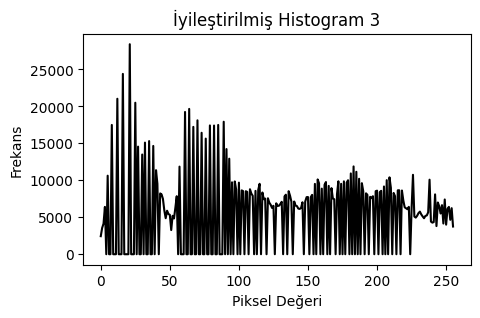

In [ ]:
for idx, path in enumerate(image_paths):  # Loop through the list of image paths, get index and path
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode

    # Histogram Equalization
    img_eq = cv2.equalizeHist(img)  # Apply histogram equalization to enhance contrast

    # Calculate histogram of the equalized image
    hist_eq, _ = plot_histograms(img_eq)  # Get the histogram using a custom function

    # Plot the histogram
    plt.figure(figsize=(5, 3))  # Create a new figure with size 5x3 inches
    plt.plot(hist_eq, color='black')  # Plot the histogram as a black line
    plt.title(f'Enhanced Histogram {idx+1}')  # Add a title showing the histogram number
    plt.xlabel('Pixel Value')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.show()  # Show the histogram on screen

iii) Cumulative Histogram

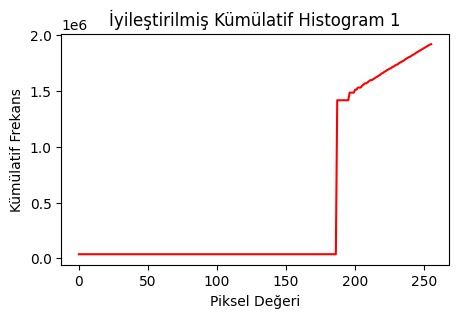

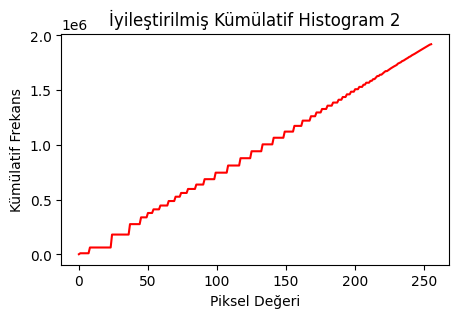

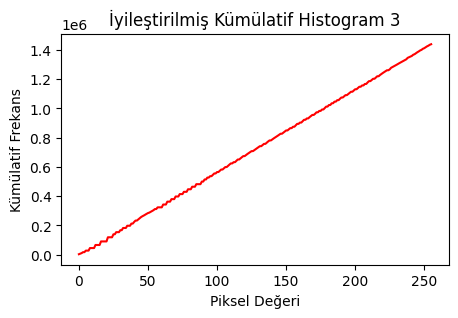

In [ ]:
for idx, path in enumerate(image_paths):  # Loop through the list of image paths, get index and path
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode

    # Histogram Equalization
    img_eq = cv2.equalizeHist(img)  # Apply histogram equalization to enhance contrast

    # Calculate cumulative histogram of the equalized image
    _, cdf_eq = plot_histograms(img_eq)  # Get the cumulative histogram (CDF) using a custom function

    # Plot the cumulative histogram
    plt.figure(figsize=(5, 3))  # Create a new figure with size 5x3 inches
    plt.plot(cdf_eq, color='red')  # Plot the cumulative histogram as a red line
    plt.title(f'Enhanced Cumulative Histogram {idx+1}')  # Add a title showing the cumulative histogram number
    plt.xlabel('Pixel Value')  # Label for the x-axis
    plt.ylabel('Cumulative Frequency')  # Label for the y-axis
    plt.show()  # Show the cumulative histogram on screen

2. Method (CLAHE)

##✅**What is CLAHE (Contrast Limited Adaptive Histogram Equalization)**?
CLAHE is an advanced technique used in image processing to enhance the contrast of an image while preventing over-amplification of noise in homogeneous regions.

---

##👉**Purpose:**
To improve local contrast by applying histogram equalization to small regions (tiles) of the image, while limiting the contrast enhancement in areas with uniform brightness.

---

##👉**How does it work?**
CLAHE divides the image into small tiles, and then applies histogram equalization to each tile. Afterward, the tiles are combined, with the contrast enhancement being limited by a parameter called clipLimit, to avoid amplifying noise in uniform areas.

---

##🔑**Key Points:**
Enhances local contrast, especially in non-uniform regions of the image.
Prevents noise amplification in flat or uniform areas of the image.
Useful for low-contrast images with varying brightness across regions.
Typically applied to grayscale images but can also be used on color images.
Involves a parameter clipLimit to control the extent of contrast enhancement.

---

##🎯**Why do we use it?**
To improve contrast in regions of the image with varying brightness.
To avoid noise in uniform regions while still enhancing the contrast in important areas.
It is particularly useful when standard histogram equalization would cause excessive contrast changes in smooth areas.

---

##💡**In short:**
CLAHE is a technique that enhances the local contrast in an image by applying histogram equalization to smaller regions (tiles) and limiting the extent of contrast enhancement to avoid over-amplification of noise. It is particularly useful for low contrast images that have varying levels of brightness across different areas.

a)

 i) ORIGINAL IMAGE

In [ ]:
for idx, path in enumerate(image_paths):  # Loop through image paths
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale

    plt.figure(figsize=(5, 5))  # Create figure
    plt.imshow(img, cmap='gray')  # Show image in gray colormap
    plt.title(f'a) i) Original Image {idx+1}')  # Add title with index
    plt.axis('off')  # Hide axes
    plt.show()  # Display image

ii) Histogram of the image

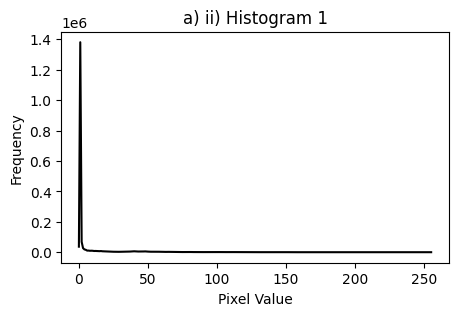

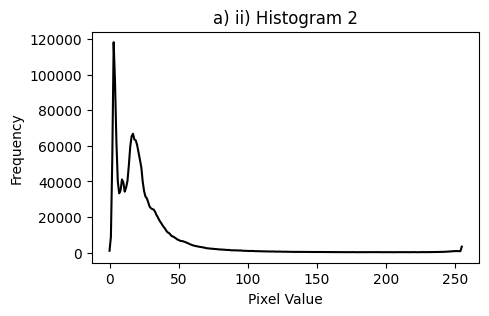

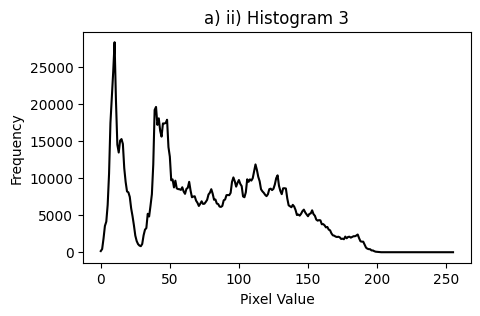

In [15]:
for idx, path in enumerate(image_paths):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    hist = plot_histogram(img)  # Get histogram

    plt.figure(figsize=(5, 3))
    plt.plot(hist, color='black')  # Plot histogram
    plt.title(f'a) ii) Histogram {idx+1}')  # Add title
    plt.xlabel('Pixel Value')  # x-axis label
    plt.ylabel('Frequency')  # y-axis label
    plt.show()  # Show histogram

iii) Cumulative Histogram

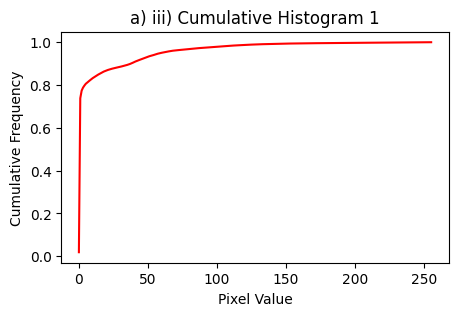

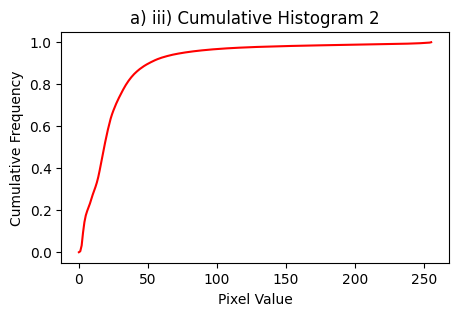

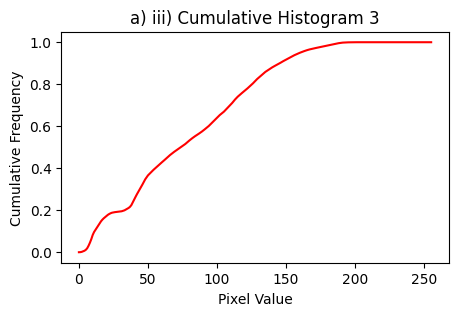

In [19]:
for idx, path in enumerate(image_paths):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    cdf = plot_cumulative_histogram(img)  # Get cumulative histogram

    plt.figure(figsize=(5, 3))
    plt.plot(cdf, color='red')  # Plot cumulative histogram
    plt.title(f'a) iii) Cumulative Histogram {idx+1}')  # Add title
    plt.xlabel('Pixel Value')  # x-axis label
    plt.ylabel('Cumulative Frequency')  # y-axis label
    plt.show()  # Show cumulative histogram

b)


i) IMPROVED IMAGE

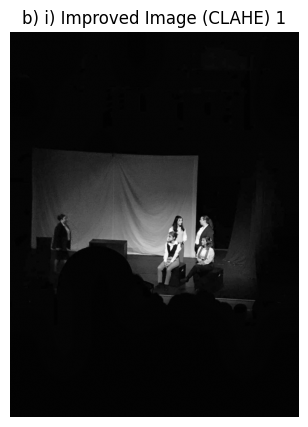

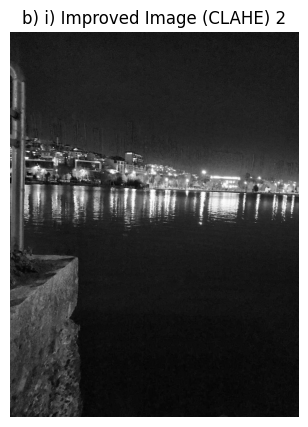

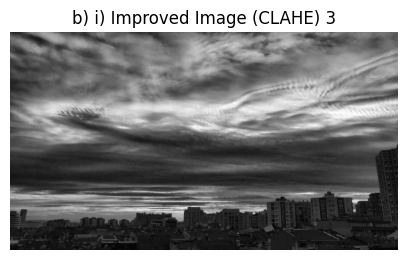

In [21]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
for idx, path in enumerate(image_paths):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    img_clahe = clahe.apply(img)  # Apply CLAHE

    plt.figure(figsize=(5, 5))
    plt.imshow(img_clahe, cmap='gray')  # Show CLAHE image
    plt.title(f'b) i) Improved Image (CLAHE) {idx+1}')  # Add title
    plt.axis('off')  # Hide axes
    plt.show()  # Display image

ii) Histogram of the image

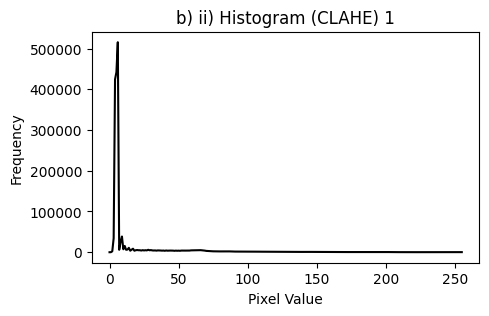

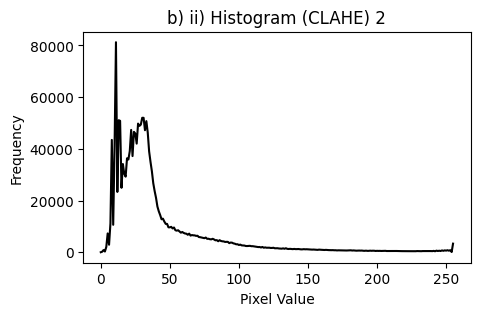

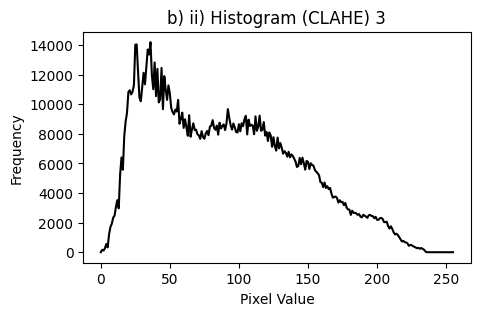

In [26]:
for idx, path in enumerate(image_paths):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    img_clahe = clahe.apply(img)  # Apply CLAHE

    hist_eq = plot_histogram(img_clahe)  # Get histogram of improved image

    plt.figure(figsize=(5, 3))
    plt.plot(hist_eq, color='black')  # Plot histogram
    plt.title(f'b) ii) Histogram (CLAHE) {idx+1}')  # Add title
    plt.xlabel('Pixel Value')  # x-axis label
    plt.ylabel('Frequency')  # y-axis label
    plt.show()  # Show histogram

iii) Cumulative Histogram

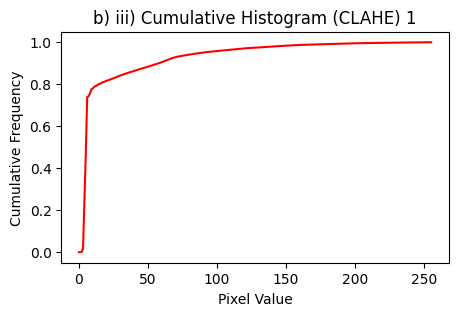

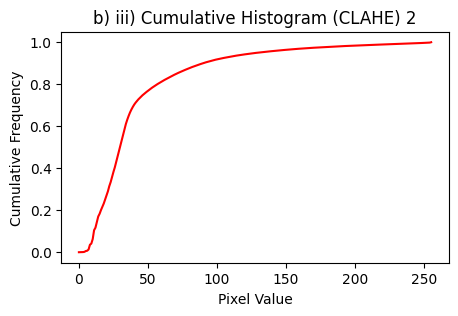

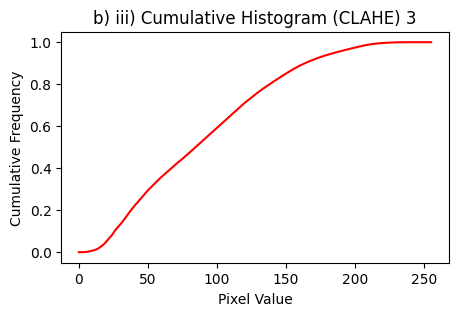

In [27]:
for idx, path in enumerate(image_paths):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    img_clahe = clahe.apply(img)  # Apply CLAHE

    cdf_eq = plot_cumulative_histogram(img_clahe)  # Get cumulative histogram

    plt.figure(figsize=(5, 3))
    plt.plot(cdf_eq, color='red')  # Plot cumulative histogram
    plt.title(f'b) iii) Cumulative Histogram (CLAHE) {idx+1}')  # Add title
    plt.xlabel('Pixel Value')  # x-axis label
    plt.ylabel('Cumulative Frequency')  # y-axis label
    plt.show()  # Show cumulative histogram

#STEP-2
In **Step 2**, we will apply a **point operation transformation function** to adjust the histogram of a single image, enhancing its contrast. The function will be designed to either stretch, compress, or modify the pixel intensity distribution based on the image's histogram, aiming to improve visibility and clarity in specific regions.

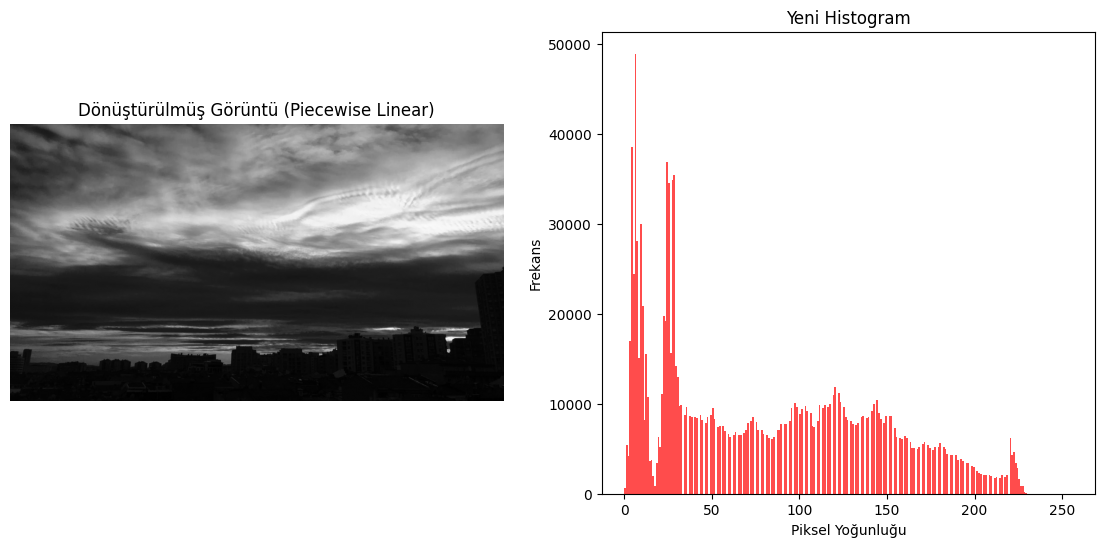

In [32]:
img_path = '/content/Group3_muhammed.jpg'  # Specify the path to your image
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Piecewise linear transformation function
def piecewise_linear_transform(image, alpha1=50, alpha2=180, beta1=30, beta2=220):
    L = 256  # Pixel value range (0-255)
    output = np.zeros_like(image, dtype=np.uint8)  # Create an empty image with the same shape as the input image

    for i in range(image.shape[0]):  # Iterate through all rows of the image
        for j in range(image.shape[1]):  # Iterate through all columns of the image
            r = image[i, j]  # Get the pixel value at position (i, j)
            if r < alpha1:  # If pixel value is below alpha1
                output[i, j] = (beta1 / alpha1) * r  # Apply the first linear transformation
            elif alpha1 <= r < alpha2:  # If pixel value is between alpha1 and alpha2
                output[i, j] = beta1 + ((beta2 - beta1) / (alpha2 - alpha1)) * (r - alpha1)  # Apply the second linear transformation
            else:  # If pixel value is above alpha2
                output[i, j] = beta2 + ((L-1 - beta2) / (L-1 - alpha2)) * (r - alpha2)  # Apply the third linear transformation

    return output  # Return the transformed image

# Apply the transformation
transformed_image = piecewise_linear_transform(image)  # Call the transformation function

# Display the image and histogram
plt.figure(figsize=(14, 6))  # Set the size of the plot

# 1. Display the transformed image
plt.subplot(1, 2, 1)  # Create a subplot for the image
plt.imshow(transformed_image, cmap='gray')  # Show the transformed image in grayscale
plt.title("Dönüştürülmüş Görüntü (Piecewise Linear)")  # Set the title for the image
plt.axis("off")  # Turn off the axis

# 2. Display the histogram
plt.subplot(1, 2, 2)  # Create a subplot for the histogram
plt.hist(transformed_image.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)  # Plot the histogram
plt.title("Yeni Histogram")  # Set the title for the histogram
plt.xlabel("Piksel Yoğunluğu")  # Set the x-axis label
plt.ylabel("Frekans")  # Set the y-axis label

plt.show()  # Display the plots

##1. **Histogram Equalization:**
Purpose: To enhance the contrast of the image.
Result: It improves overall contrast, but may cause overexposure in bright areas and introduce noise in low-contrast images.
##2. **CLAHE (Contrast Limited Adaptive Histogram Equalization):**
Purpose: To improve local contrast and limit noise.
Result: It provides local improvements and delivers more natural results without increasing noise.
##3. **Piecewise Linear Transformation:**
Purpose: To control contrast enhancement by modifying specific pixel ranges.
Result: It provides a flexible and controlled enhancement, improving specific areas of the image.
##4. **Logarithmic Transformation:**
Purpose: To enhance details in dark areas and compress bright areas.
Result: It makes dark areas more detailed, but can cause contrast loss in bright regions.
##5. **Gamma Correction:**
Purpose: To balance brightness and dark areas in the image.
Result: It adjusts the brightness, making dark areas darker or bright areas brighter depending on the gamma value.
##6. **Contrast Stretching:**
Purpose: To increase the contrast by stretching the pixel intensity range.
Result: It enhances the difference between low and high contrast areas, but may cause distortion in bright areas.
##7. **Median Filtering:**
Purpose: To reduce noise while preserving image details.
Result: It reduces roughness and noise, but may result in a loss of sharpness.
##8. **Sobel Edge Detection:**
Purpose: To detect edges in the image and enhance visual details.
Result: It makes edges sharp, but can cause loss of other details in the image.

#**References**


##https://www.youtube.com/watch?v=uqeOrtAzSyU
##https://www.youtube.com/results?search_query=image+processing+histogram+equalization
##https://chatgpt.com/
##https://gemini.google.com/app?hl=tr